In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics.pairwise import haversine_distances


In [3]:
df=pd.read_csv("taxipricedata.csv", nrows=100000)


In [4]:
print(df.head(5))
print(df.shape)


       key  fare_amount          pickup_datetime  pickup_longitude  \
0  26:21.0          4.5  2009-06-15 17:26:21 UTC        -73.844311   
1  52:16.0         16.9  2010-01-05 16:52:16 UTC        -74.016048   
2  35:00.0          5.7  2011-08-18 00:35:00 UTC        -73.982738   
3  30:42.0          7.7  2012-04-21 04:30:42 UTC        -73.987130   
4  51:00.0          5.3  2010-03-09 07:51:00 UTC        -73.968095   

   pickup_latitude  dropoff_longitude  dropoff_latitude  passenger_count  
0        40.721319         -73.841610         40.712278                1  
1        40.711303         -73.979268         40.782004                1  
2        40.761270         -73.991242         40.750562                2  
3        40.733143         -73.991567         40.758092                1  
4        40.768008         -73.956655         40.783762                1  
(100000, 8)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   key                100000 non-null  object 
 1   fare_amount        100000 non-null  float64
 2   pickup_datetime    100000 non-null  object 
 3   pickup_longitude   100000 non-null  float64
 4   pickup_latitude    100000 non-null  float64
 5   dropoff_longitude  100000 non-null  float64
 6   dropoff_latitude   100000 non-null  float64
 7   passenger_count    100000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 6.1+ MB
None


In [6]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])-datetime.timedelta(hours=4)


In [7]:
print(df.info())
print(df.head(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   key                100000 non-null  object             
 1   fare_amount        100000 non-null  float64            
 2   pickup_datetime    100000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   100000 non-null  float64            
 4   pickup_latitude    100000 non-null  float64            
 5   dropoff_longitude  100000 non-null  float64            
 6   dropoff_latitude   100000 non-null  float64            
 7   passenger_count    100000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1), object(1)
memory usage: 6.1+ MB
None
       key  fare_amount           pickup_datetime  pickup_longitude  \
0  26:21.0          4.5 2009-06-15 13:26:21+00:00        -73.844311   
1  52:16.0         16.9 2010-01-05 12:52:16+00:0

In [8]:
df["Year"] = df["pickup_datetime"].dt.year
df["Month"] = df["pickup_datetime"].dt.month
df["Day"] = df["pickup_datetime"].dt.day
df["Hours"] = df["pickup_datetime"].dt.hour
df["Minute"] = df["pickup_datetime"].dt.minute

In [9]:
df["mornight"] = np.where(df["Hours"]<12,0,1)

In [10]:
df.drop("pickup_datetime", axis=1,inplace=True)

In [11]:
df.drop("key", axis=1, inplace=True)

In [12]:
print(df.head(5))

   fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          4.5        -73.844311        40.721319         -73.841610   
1         16.9        -74.016048        40.711303         -73.979268   
2          5.7        -73.982738        40.761270         -73.991242   
3          7.7        -73.987130        40.733143         -73.991567   
4          5.3        -73.968095        40.768008         -73.956655   

   dropoff_latitude  passenger_count  Year  Month  Day  Hours  Minute  \
0         40.712278                1  2009      6   15     13      26   
1         40.782004                1  2010      1    5     12      52   
2         40.750562                2  2011      8   17     20      35   
3         40.758092                1  2012      4   21      0      30   
4         40.783762                1  2010      3    9      3      51   

   mornight  
0         1  
1         1  
2         1  
3         0  
4         0  


In [13]:
from math import radians, cos, sin, asin, sqrt
##def haversine_distances(df):

In [14]:
lat1=np.radians(df["pickup_latitude"]).astype(float)
print(type(lat1))

<class 'pandas.core.series.Series'>


In [16]:
lat2=np.radians(df["dropoff_latitude"]).astype(float)
dlat= np.radians(df["dropoff_latitude"]-df["dropoff_latitude"]).astype(float)
dlong=np.radians(df["dropoff_longitude"]-df["pickup_longitude"]).astype(float)
a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1-a))
r = 6371 # Radius of earth in kilometers. Use 3956 for miles. Determines return value units.
haver=c * r

In [17]:
df["Total distance"] = haver


In [18]:
x=df.iloc[:,[1,2,3,4,5,6,7]]
print(x)


       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0            -73.844311        40.721319         -73.841610         40.712278   
1            -74.016048        40.711303         -73.979268         40.782004   
2            -73.982738        40.761270         -73.991242         40.750562   
3            -73.987130        40.733143         -73.991567         40.758092   
4            -73.968095        40.768008         -73.956655         40.783762   
...                 ...              ...                ...               ...   
99995        -73.947977        40.784792         -73.964262         40.792347   
99996        -73.962918        40.799107         -73.974178         40.786487   
99997        -73.996773        40.723549         -73.991974         40.724724   
99998        -73.983652        40.756667         -73.982715         40.767067   
99999        -73.975663        40.791653         -73.982267         40.774968   

       passenger_count  Yea

In [19]:
y=df.iloc[:,0]
print(y)

0         4.5
1        16.9
2         5.7
3         7.7
4         5.3
         ... 
99995     9.0
99996     6.0
99997     5.0
99998     6.9
99999     5.7
Name: fare_amount, Length: 100000, dtype: float64


In [20]:
print(df.isnull().sum())

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
Year                 0
Month                0
Day                  0
Hours                0
Minute               0
mornight             0
Total distance       0
dtype: int64


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [22]:
print(X_train)
print(X_train.info)
print(y_train)

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
42865        -73.991920        40.737876         -74.001000         40.736213   
91446        -73.967893        40.802332         -73.949392         40.802367   
66374        -73.952307        40.778254         -73.962754         40.775510   
79106        -73.945372        40.774302         -73.953233         40.782567   
13404        -73.976969        40.754250         -73.963498         40.770816   
...                 ...              ...                ...               ...   
21243        -74.005157        40.748157         -73.975639         40.749119   
45891        -73.959932        40.763665         -73.981843         40.777745   
42613        -73.985142        40.732463         -73.996279         40.737135   
43567        -73.786035        40.641653         -73.977947         40.752295   
68268        -73.789683        40.647283         -73.947907         40.780490   

       passenger_count  Yea

In [23]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_train_scaled=scaler.fit_transform(X_train)
print(df_train_scaled)

[[-0.13825521  0.13072181 -0.14403065 ... -0.52152926  0.67553437
  -1.2341314 ]
 [-0.1360229   0.1409961  -0.13909902 ... -0.52152926 -0.39715592
   1.65981427]
 [-0.13457483  0.13715807 -0.14037589 ...  1.00804225 -1.46984621
   1.65981427]
 ...
 [-0.13762548  0.12985897 -0.14357951 ... -0.52152926  0.67553437
   1.65981427]
 [-0.11912677  0.11538384 -0.14182772 ... -0.52152926 -1.46984621
   1.65981427]
 [-0.1194657   0.11628127 -0.13895712 ...  0.2432565  -0.39715592
  -1.52352597]]


In [24]:
df_test_scaled=scaler.transform(X_test)
print(df_test_scaled)

[[-0.13723006  0.13506801 -0.14408225 ... -0.52152926  1.21187952
  -0.65534227]
 [-0.1379855   0.128129   -0.1414537  ... -0.52152926 -1.46984621
   0.21284144]
 [-0.13658258  0.134721   -0.14307553 ...  0.2432565   1.21187952
   0.502236  ]
 ...
 [-0.13600134  0.1329939  -0.14380799 ... -0.52152926  0.13918923
   0.502236  ]
 [-0.13671126  0.13455921 -0.13979097 ...  0.2432565  -0.39715592
  -0.65534227]
 [-0.14057598  0.12590244 -0.14468019 ... -0.52152926  1.74822466
  -0.94473683]]


In [25]:
#Linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(df_train_scaled, y_train)

LinearRegression()

In [26]:
# Predicting the Test set results for linear regression
y_pred = regressor.predict(df_test_scaled)
print(y_test.head(5))
print(y_pred)

3582     13.5
60498     6.1
53227    17.0
21333     4.1
3885     16.0
Name: fare_amount, dtype: float64
[12.4959329   9.62847814 13.04363095 ... 11.67397546 10.65012249
 13.02276968]


R-Square value with linear reg 0.015059743750562626


C:\Users\shaha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


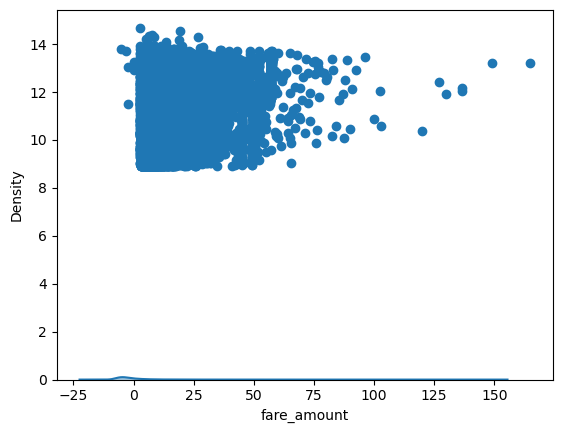

In [29]:
from sklearn.metrics import r2_score
score2_l = r2_score(y_test,y_pred)
print("R-Square value with linear reg", score2_l)
sns.distplot(y_test-y_pred)
plt.scatter(y_test,y_pred)


In [30]:
from sklearn.ensemble import RandomForestRegressor
regressorRF=RandomForestRegressor()
regressorRF.fit(df_train_scaled, y_train)
y_predrf= regressorRF.predict(df_test_scaled)


R-Square value with Random forest reg 0.7878988704964469


C:\Users\shaha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


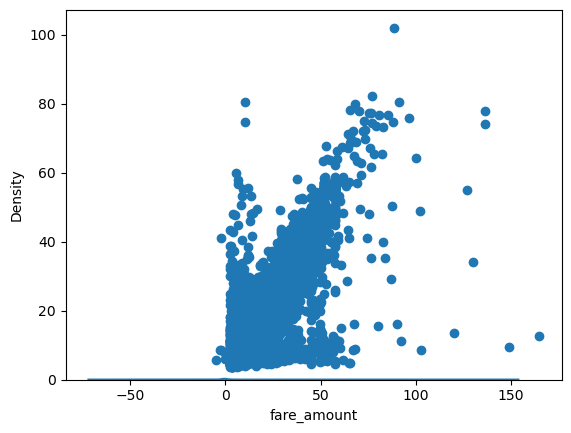

In [31]:
from sklearn.metrics import r2_score
score2_rf = r2_score(y_test,y_predrf)
print("R-Square value with Random forest reg", score2_rf)
sns.distplot(y_test-y_predrf)
plt.scatter(y_test,y_predrf)